# Feature Selection & Random Forest-based Model

In this kernel I will develop a solution by first, selecting the most relevant features and then applying a random forest to solve the classification problem

## 1. Let's get started

In [2]:
# Author: Fernando Lopez
import numpy as np 
import pandas as pd 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sb

Loading the `train.csv` file and assigning the `target` column to our target `y`.

In [3]:
x = pd.read_csv('train.csv')
y = x['target']

x = x.drop(['target','ID_code'],axis=1)

## 2. Scaling Features

One of the most common techniques to scale features is to apply  `MinMaxScaler`. 
First, I will transform the pandas dataframe into numpy arrays.

In [5]:
x = x.values
y = y.values

Then I will initialize the `MinMaxScaler` function, fit `x` and transform it.

In [6]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

## 3. Feature Selection
How to chose the best `n` features from a given dataset?. To extract features from a given dataset is an art. There many techinques to select the best `n` features. In this stage, I will select the top `n` features by first comparing the variance given a compression technique as PCA and then chosing the top `n` which give the more variance.

Text(0, 0.5, 'Variance Ratio')

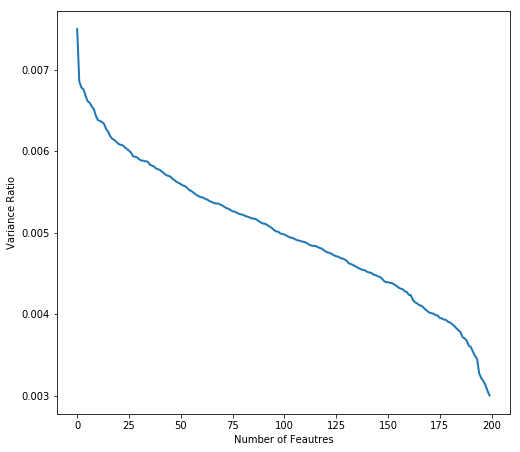

In [7]:
pca = PCA()
pca.fit(x)

plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Feautres')
plt.ylabel('Variance Ratio')

Given the plot, I will try to chose the top `25` features.

### 3.1 Applying Random Forest as technique to select the top 25 features.

In [8]:
RF = RandomForestClassifier() 
RF = RF.fit(x, y)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Now, given each estimator of the random forest  `RF`, I will calculate the standard deviation and sort them. By sorting these results, we will see the top `n` features.

In [10]:
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)


Sorting:

In [11]:
indices = np.argsort(std)[::-1]

Now let's see the rank

In [12]:
print("Feature Rank:")

for i in range(x.shape[1]):
    print("%d. Feature %d (%f)" 
          % (i + 1, indices[i], std[indices[i]]))

Feature Rank:
1. Feature 139 (0.001838)
2. Feature 12 (0.001313)
3. Feature 81 (0.001225)
4. Feature 2 (0.001216)
5. Feature 109 (0.001178)
6. Feature 32 (0.001161)
7. Feature 146 (0.001155)
8. Feature 99 (0.001132)
9. Feature 78 (0.001129)
10. Feature 6 (0.001122)
11. Feature 98 (0.001121)
12. Feature 154 (0.001118)
13. Feature 40 (0.001111)
14. Feature 80 (0.001104)
15. Feature 131 (0.001070)
16. Feature 149 (0.001051)
17. Feature 53 (0.001047)
18. Feature 69 (0.001025)
19. Feature 163 (0.001014)
20. Feature 148 (0.001012)
21. Feature 116 (0.001011)
22. Feature 191 (0.000996)
23. Feature 76 (0.000982)
24. Feature 33 (0.000973)
25. Feature 82 (0.000972)
26. Feature 26 (0.000967)
27. Feature 83 (0.000948)
28. Feature 145 (0.000940)
29. Feature 174 (0.000934)
30. Feature 107 (0.000930)
31. Feature 1 (0.000927)
32. Feature 91 (0.000922)
33. Feature 169 (0.000920)
34. Feature 123 (0.000918)
35. Feature 161 (0.000915)
36. Feature 192 (0.000913)
37. Feature 122 (0.000907)
38. Feature 129 (0

As I suggested, I will select the top `25` features. Let's do that.

In [13]:
x_ = []
for i in range(25):
    x_.append(x[:,indices[i]])
x_ = np.array(x_)

In [14]:
x_ = x_.T

## 4. Random Forest Classifier

I will implement a simple random forest classifier to solve the classification problem. <br>
First, I will split the `x_` into train and test.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_, y, test_size=0.15, random_state=42)

Initialization and fit.

In [16]:
rfm = RandomForestClassifier()      
rfm = rfm.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Our random forest model has already been trained. Let's test our model.

In [17]:
y_pred = rfm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.8959666666666667


An acceptable accuracy. <br>
Let's take a look at a confusion matrix to see the model behavior.

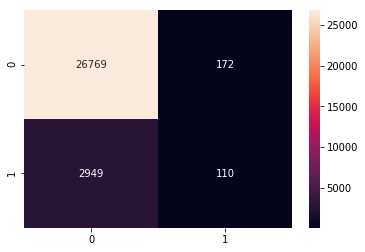

In [18]:
confMatrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confMatrix, annot=True, fmt="d")

## 5. Conclusion

We have seen how to select the top `n` features by first applying a compression technique such as PCA, then applying a random forest model to rank the features by variance in each stimator and then applying random forest to solve the classifcation problem.

For future work I would like try another method to extract features such as univariate feature selection or even recursive feature selection (RF). 